In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import MSELoss
from torch.nn import BCELoss, BCEWithLogitsLoss
from torch.optim import SGD, Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_breast_cancer

# Carica dataset
data = load_breast_cancer()
print(f'columns:  {data.feature_names}')
X, y = data.data, data.target

# Crea DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

columns:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#print 0 in targe column
print(f"Number of 0: {len(df[df['target'] == 0])}")
#print 1 in targe column
print(f"Number of 1: {df[df['target'] == 1].shape}")


Number of 0: 212
Number of 1: (357, 31)


In [ ]:
# Dividi in training e test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify bilancia le classi
)

In [ ]:
print(f'Number of 0 in training set: {len(y_train[y_train == 0])}')
print(f'Number of 1 in training set: {len(y_train[y_train == 1])}')

print(f'Number of 0 in test set: {len(y_test[y_test == 0])}')
print(f'Number of 1 in test set: {len(y_test[y_test == 1])}')

Number of 0 in training set: 170
Number of 1 in training set: 285
Number of 0 in test set: 42
Number of 1 in test set: 72


In [ ]:
#X_train and test Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Esempio per vedere se la prima colonna ha effettivamente media 0 e deviazione standard 1
col0 = X_train[:, 29]
col0.mean(), col0.std()


(np.float64(-2.0886833166574374e-15), np.float64(1.0000000000000002))

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:

X_train.size()

torch.Size([455, 30])

In [ ]:
class tumorDataset(Dataset):
    def __init__(self, inputs, binaryTarget):
        self.x = inputs
        self.y = binaryTarget

    def __len__(self):
        return self.x.size(0)   # <-- doppio underscore qui

    def __getitem__(self, index):   # <-- anche qui
        inp = self.x[index]
        t = self.y[index]
        return inp, t


In [ ]:
dataset = tumorDataset(X_train, y_train)

In [ ]:
len(dataset)

455

Build Neural Network

In [ ]:
class classifierNN(nn.Module):
  """Double-layer neural network with sigmoid activation."""

  def __init__(self, n_input, n_hidden, n_output):
    super().__init__()
    self.linear1 = nn.Linear(n_input, n_hidden)
    self.linear2= nn.Linear(n_hidden, n_output)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self, x):
    act_hidd = self.linear1(x)
    h_x = self.sigmoid(act_hidd)
    act_o = self.linear2(h_x)
    output = self.sigmoid(act_o)
    return output

Train Classifier NN

In [ ]:
model = classifierNN(30, 15, 1)

In [ ]:
loss = BCELoss()
# optimizer = SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

dataloader

In [ ]:
dataloader = DataLoader(dataset, batch_size=10, drop_last=False, shuffle=False)

In [ ]:
for i, batch in enumerate(dataloader):
    print(f"batch {i}: x: {batch[0]}, \ny: {batch[1]}")
    break

batch 0: x: tensor([[-1.0720e+00, -6.5842e-01, -1.0881e+00, -9.3927e-01, -1.3594e-01,
         -1.0087e+00, -9.6836e-01, -1.1020e+00,  2.8106e-01, -1.1323e-01,
         -7.0486e-01, -4.4094e-01, -7.4395e-01, -6.2980e-01,  7.4806e-04,
         -9.9157e-01, -6.9376e-01, -9.8328e-01, -5.9158e-01, -4.2897e-01,
         -1.0341e+00, -6.2350e-01, -1.0708e+00, -8.7653e-01, -1.6998e-01,
         -1.0388e+00, -1.0790e+00, -1.3505e+00, -3.5266e-01, -5.4138e-01],
        [ 1.7487e+00,  6.6502e-02,  1.7512e+00,  1.7456e+00,  1.2745e+00,
          8.4229e-01,  1.5199e+00,  1.9947e+00, -2.9305e-01, -3.2018e-01,
          1.2757e-01, -3.8138e-01,  9.4075e-02,  3.1752e-01,  6.3966e-01,
          8.7389e-02,  7.0845e-01,  1.1822e+00,  4.2621e-01,  7.4797e-02,
          1.2283e+00, -9.2833e-02,  1.1875e+00,  1.1044e+00,  1.5170e+00,
          2.4965e-01,  1.1786e+00,  1.5499e+00,  1.9108e-01, -1.7374e-01],
        [-9.7473e-01, -9.3112e-01, -9.9771e-01, -8.6759e-01, -6.1351e-01,
         -1.1382e+00, -1

In [ ]:
epochs = 500

mean_error = []
predictions = []

In [ ]:
model.train()

classifierNN(
  (linear1): Linear(in_features=30, out_features=15, bias=True)
  (linear2): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)

In [ ]:
epochs = 500

mean_error = []
predictions = []

for e in list(range(epochs)):

  model.train()
  errors = []

  for batch in dataloader:

    x,target = batch

    target_pred = model(x)

    error = loss(target_pred, target)

    error.backward()
    optimizer.step()
    optimizer.zero_grad()

    errors.append(error.item())

  mean_error.append(np.mean(errors))
  prediction_on_target = model(torch.tensor(X_train).float()).detach().numpy()
  predictions.append(prediction_on_target)



/tmp/ipython-input-584705264.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prediction_on_target = model(torch.tensor(X_train).float()).detach().numpy()


In [ ]:
import matplotlib.pyplot as plt

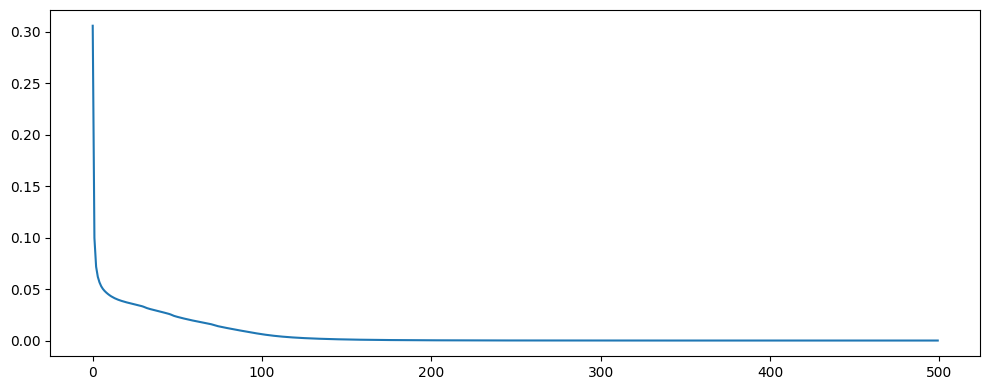

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(mean_error)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
with torch.no_grad():
    logits = model(X_test)
    probs = torch.sigmoid(logits)
    preds = (probs > 0.5).float()

    accuracy = (preds == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

    y_true = y_test.cpu().numpy()
    y_pred = preds.cpu().numpy()

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")


Test Accuracy: 0.9825
Precision: 0.9730
Recall:    1.0000
F1-score:  0.9863
